# 什么是Pytorch，为什么选择Pytroch？

Pytorch源于Torch，原先只有Lua语言的接口，随着Python的流行以及其生态完整性和接口易用性。在2017年，Torch的幕后团队推出了PyTorch。PyTorch不是简单地封装Lua Torch提供Python接口，而是对Tensor之上的所有模块进行了重构，并新增了最先进的自动求导系统，成为当下最流行的动态图框架。

PyTorch 是一个基于 Python 的科学计算包，主要定位两类人群：
- NumPy 的替代品，可以利用 GPU 的性能进行计算。
- 深度学习研究平台拥有足够的灵活性和速度

选择Pytorch的原因：
1. 简洁：PyTorch的设计追求最少的封装，尽量避免重复造轮子。
    1. PyTorch的设计遵循tensor→variable(autograd)→nn.Module 三个由低到高的抽象层次，分别代表高维数组（张量）、自动求导（变量）和神经网络（层/模块），而且这三个抽象之间联系紧密，可以同时进行修改和操作。
    2. 简洁的设计带来的另外一个好处就是代码易于理解。PyTorch的源码只有TensorFlow的十分之一左右，更少的抽象、更直观的设计使得PyTorch的源码十分易于阅读。在笔者眼里，PyTorch的源码甚至比许多框架的文档更容易理解。
2. 速度：PyTorch的灵活性不以速度为代价，在许多评测中，PyTorch的速度表现胜过TensorFlow和Keras等框架。框架的运行速度和程序员的编码水平有极大关系，但同样的算法，使用PyTorch实现的那个更有可能快过用其他框架实现的。
3. 易用：PyTorch是所有的框架中面向对象设计的最优雅的一个。
    1. PyTorch的面向对象的接口设计来源于Torch，而Torch的接口设计以灵活易用而著称，Keras作者最初就是受Torch的启发才开发了Keras。
    2. PyTorch继承了Torch的衣钵，尤其是API的设计和模块的接口都与Torch高度一致。PyTorch的设计最符合人们的思维，它让用户尽可能地专注于实现自己的想法，即所思即所得，不需要考虑太多关于框架本身的束缚。
4. 活跃的社区：PyTorch提供了完整的文档，循序渐进的指南，作者亲自维护的论坛 供用户交流和求教问题。Facebook 人工智能研究院对PyTorch提供了强力支持，作为当今排名前三的深度学习研究机构，FAIR的支持足以确保PyTorch获得持续的开发更新，不至于像许多由个人开发的框架那样昙花一现。

# Pytroch的安装

1. 打开[Pytorch官网](https://pytorch.org/)
2. 打开[配置命令页面](https://pytorch.org/get-started/locally/),进行命令选择
    1. PyTorch Build：选择稳定版本stable或最新版本Preview
    2. OS（操作系统）：Linux/Mac/Windows
    3. Package（包管理工具）：Conda/Pip/LibTorch/Source
    4. 语言：选择Python版本
    5. 选择CUDA的版本，无GPU选择NONE
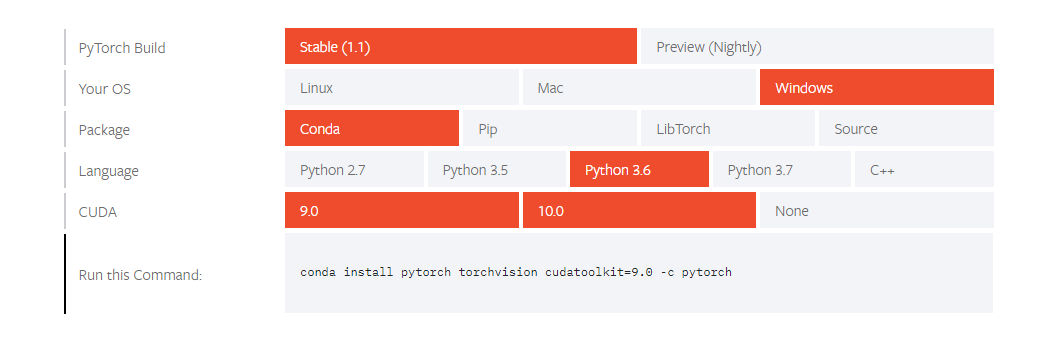
4. 打开命令行或包管理工具界面输入安装命令

# 配置Python环境


- 由于直接安装[python官网](https://www.python.org/)的安装包，主要起到一个解释器的作用，因此还需要自己进行扩展包的管理。
- 主要参考借鉴教程-[Anaconda完全入门指南](https://www.jianshu.com/p/eaee1fadc1e9)和[Anaconda介绍、安装及使用教程](https://www.jianshu.com/p/62f155eb6ac5)完成anaconda的安装
- jupyter notebook可以对于先学习python基础有较好的效果展示，安装anaconda后进行jupyter notebook 的安装和配置.参考[Jupyter Notebook 超实用的 5 个插件，值得一试！](https://blog.csdn.net/weixin_33671935/article/details/85181176)

# 准备Python管理器


同上3

# 通过命令行安装PyTorch

同上2

# PyTorch基础概念

PyTorch主要基于Torch科学计算包进行自动快速计算梯度，并基于此进行高层封装，使得PyTorch可以快速搭建深度学习框架，并通过GPU进行加速计算。

# 通用代码实现流程(实现一个深度学习的代码流程)


一般框架在深度学习网络搭建和训练都有实现的步骤，PyTorch的步骤主要如下：
1. 加载数据，并转换为Variable
2. 搭建深度学习网络框架
3. 定义优化调度和损失函数
4. 训练网络

下面以该程序为例进行分析：

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
torch.manual_seed(1)    # reproducible

In [5]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
DOWNLOAD_MNIST = True   # set to False if you have downloaded

## 加载数据

In [6]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

C:\Program Files\Miniconda\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Program Files\Miniconda\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000])


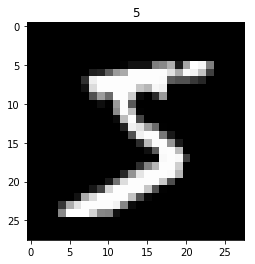

In [7]:
# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [8]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [9]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

C:\Program Files\Miniconda\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Program Files\Miniconda\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## 搭建深度学习网络结构

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [11]:
cnn = CNN()
print(cnn)  # net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


## 定义优化方法和损失函数

In [12]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

## 训练网络

Epoch:  0 | train loss: 2.2577 | test accuracy: 0.16


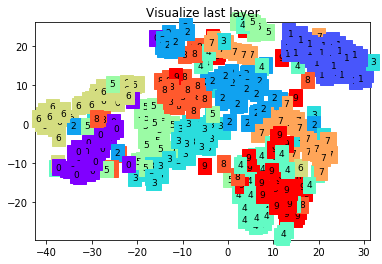

Epoch:  0 | train loss: 0.2709 | test accuracy: 0.89


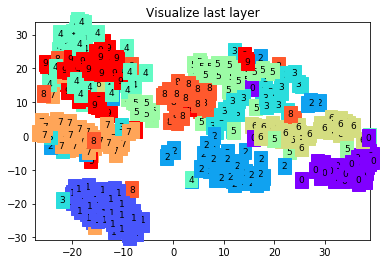

Epoch:  0 | train loss: 0.0976 | test accuracy: 0.93


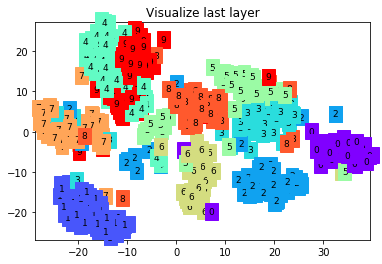

Epoch:  0 | train loss: 0.2052 | test accuracy: 0.95


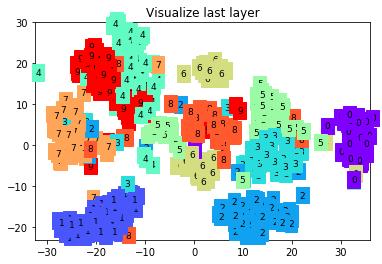

Epoch:  0 | train loss: 0.1724 | test accuracy: 0.96


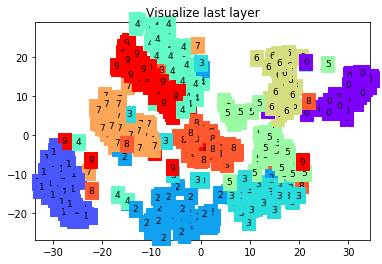

Epoch:  0 | train loss: 0.1104 | test accuracy: 0.97


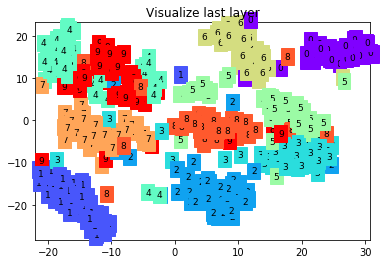

Epoch:  0 | train loss: 0.0202 | test accuracy: 0.97


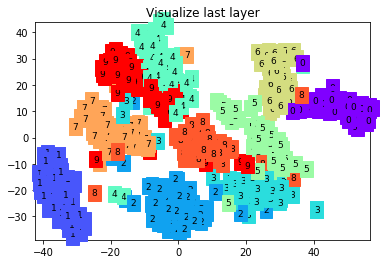

Epoch:  0 | train loss: 0.0781 | test accuracy: 0.97


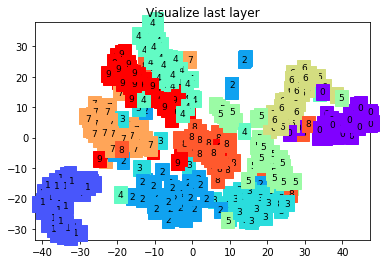

Epoch:  0 | train loss: 0.1098 | test accuracy: 0.97


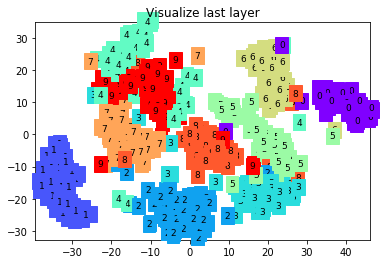

Epoch:  0 | train loss: 0.0813 | test accuracy: 0.97


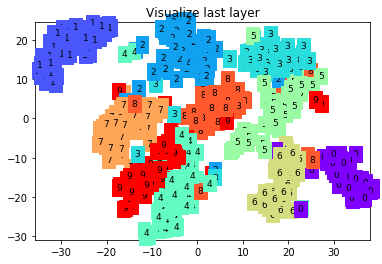

Epoch:  0 | train loss: 0.0361 | test accuracy: 0.98


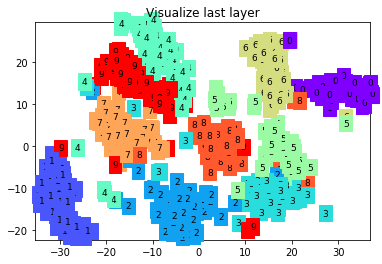

Epoch:  0 | train loss: 0.0987 | test accuracy: 0.98


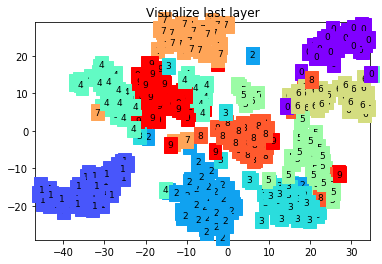

In [16]:
# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

In [17]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
